In [28]:
import numpy as np
import pandas as pd

import statsmodels.api as sm
import linearmodels.iv.model as lm

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.datasets import load_diabetes

## Load diabetes dataset

In [16]:
diabetes_data = load_diabetes(as_frame=True)
diabetes_data["DESCR"]

'.. _diabetes_dataset:\n\nDiabetes dataset\n----------------\n\nTen baseline variables, age, sex, body mass index, average blood\npressure, and six blood serum measurements were obtained for each of n =\n442 diabetes patients, as well as the response of interest, a\nquantitative measure of disease progression one year after baseline.\n\n**Data Set Characteristics:**\n\n:Number of Instances: 442\n\n:Number of Attributes: First 10 columns are numeric predictive values\n\n:Target: Column 11 is a quantitative measure of disease progression one year after baseline\n\n:Attribute Information:\n    - age     age in years\n    - sex\n    - bmi     body mass index\n    - bp      average blood pressure\n    - s1      tc, total serum cholesterol\n    - s2      ldl, low-density lipoproteins\n    - s3      hdl, high-density lipoproteins\n    - s4      tch, total cholesterol / HDL\n    - s5      ltg, possibly log of serum triglycerides level\n    - s6      glu, blood sugar level\n\nNote: Each of thes

In [17]:
diabetes_df = diabetes_data["frame"]
diabetes_df

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0
...,...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207,178.0
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018114,0.044485,104.0
439,0.041708,0.050680,-0.015906,0.017293,-0.037344,-0.013840,-0.024993,-0.011080,-0.046883,0.015491,132.0
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044529,-0.025930,220.0


## i) Data Pre-processing and Exploratory data analysis

- Checking for any missing or NA values

In [18]:
# Check for missing values (NaN)
diabetes_df.isnull().sum()

age       0
sex       0
bmi       0
bp        0
s1        0
s2        0
s3        0
s4        0
s5        0
s6        0
target    0
dtype: int64

In [19]:
# Check for missing values (NaN)
diabetes_df.isna().sum()

age       0
sex       0
bmi       0
bp        0
s1        0
s2        0
s3        0
s4        0
s5        0
s6        0
target    0
dtype: int64

In [20]:
# Check if there are any missing values in the DataFrame
diabetes_df.isna().any().any()

False

- Exploratory Data Analysis

In [21]:
# Summary Statistics
diabetes_df.describe()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
count,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,442.000000
mean,-2.511817e-19,1.230790e-17,-2.245564e-16,-4.797570e-17,-1.381499e-17,3.918434e-17,-5.777179e-18,-9.042540e-18,9.293722e-17,1.130318e-17,152.133484
std,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,77.093005
min,-1.072256e-01,-4.464164e-02,-9.027530e-02,-1.123988e-01,-1.267807e-01,-1.156131e-01,-1.023071e-01,-7.639450e-02,-1.260971e-01,-1.377672e-01,25.000000
25%,-3.729927e-02,-4.464164e-02,-3.422907e-02,-3.665608e-02,-3.424784e-02,-3.035840e-02,-3.511716e-02,-3.949338e-02,-3.324559e-02,-3.317903e-02,87.000000
50%,5.383060e-03,-4.464164e-02,-7.283766e-03,-5.670422e-03,-4.320866e-03,-3.819065e-03,-6.584468e-03,-2.592262e-03,-1.947171e-03,-1.077698e-03,140.500000
75%,3.807591e-02,5.068012e-02,3.124802e-02,3.564379e-02,2.835801e-02,2.984439e-02,2.931150e-02,3.430886e-02,3.243232e-02,2.791705e-02,211.500000
max,1.107267e-01,5.068012e-02,1.705552e-01,1.320436e-01,1.539137e-01,1.987880e-01,1.811791e-01,1.852344e-01,1.335973e-01,1.356118e-01,346.000000


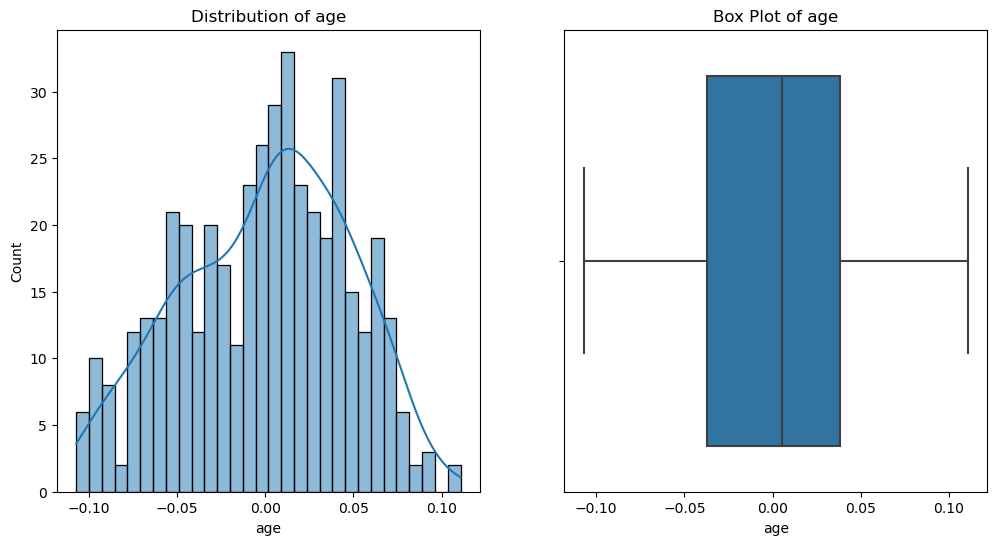

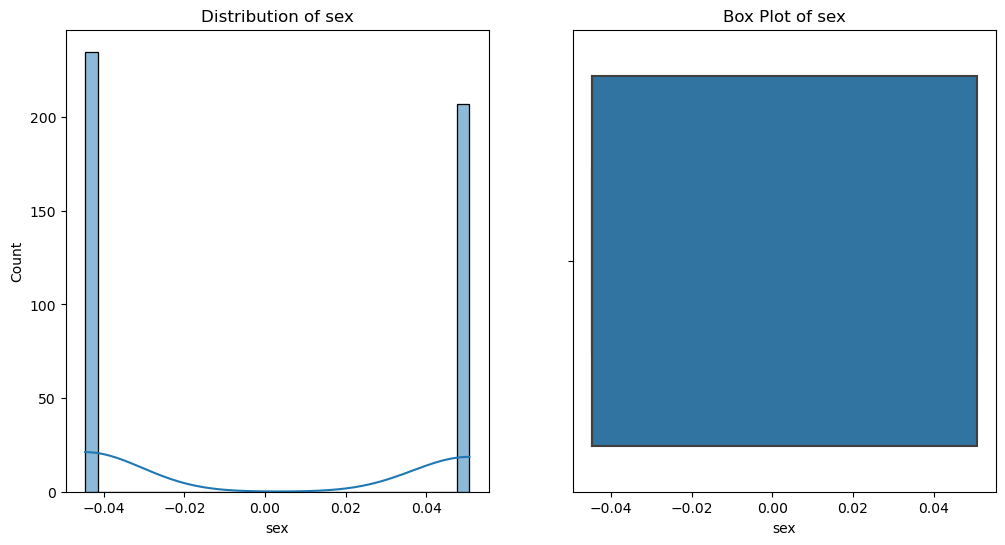

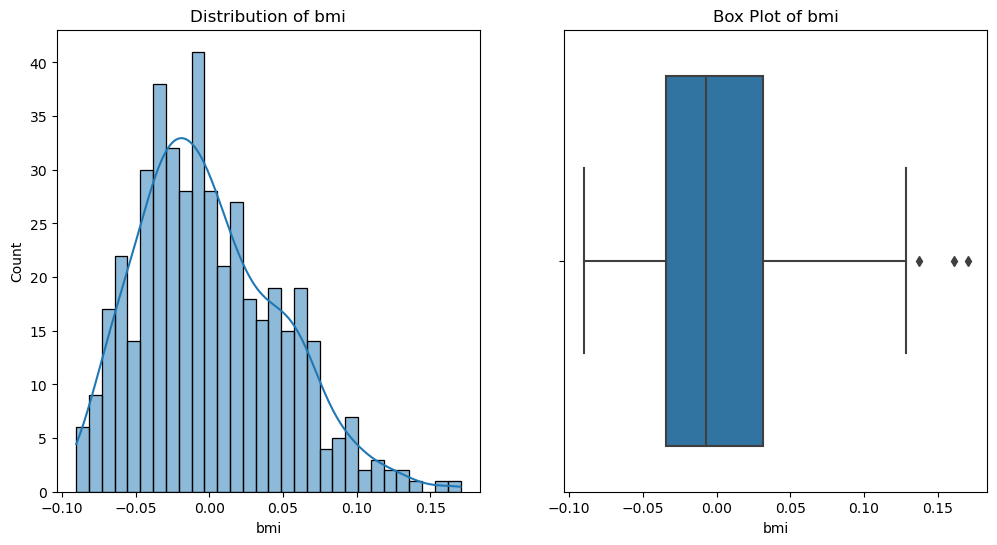

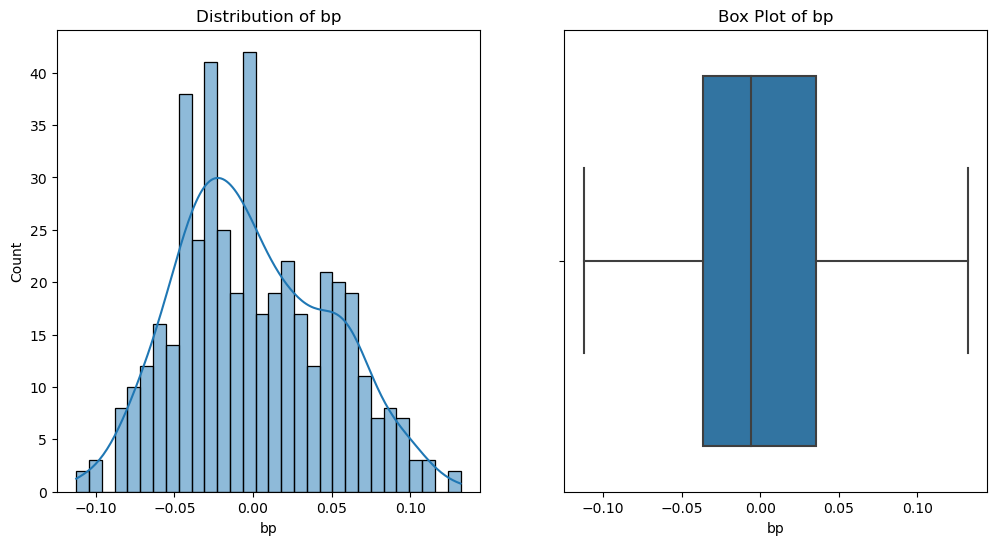

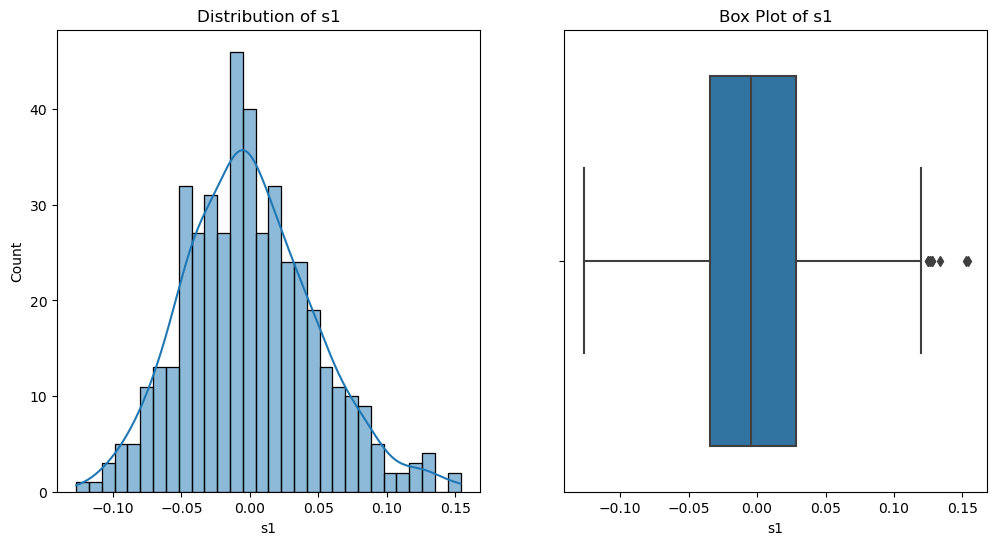

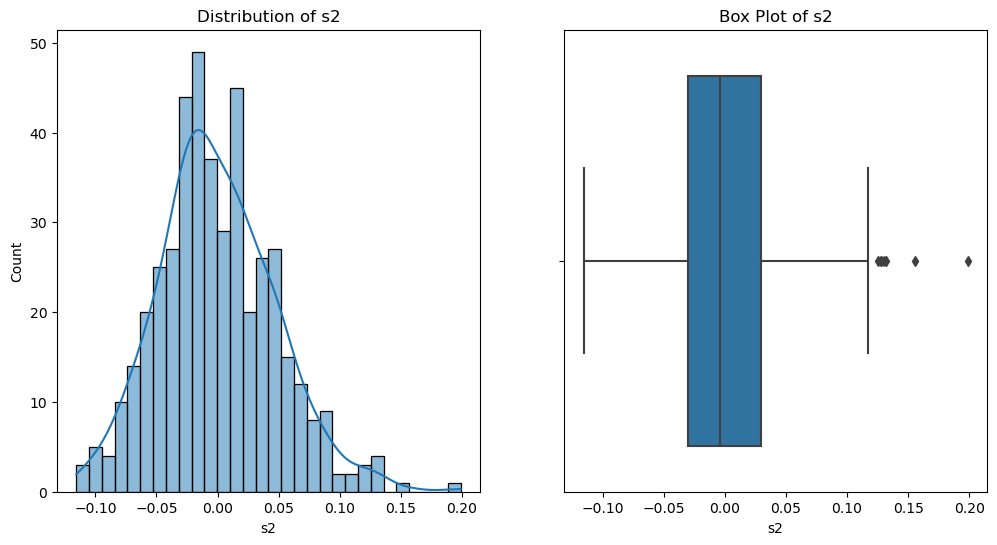

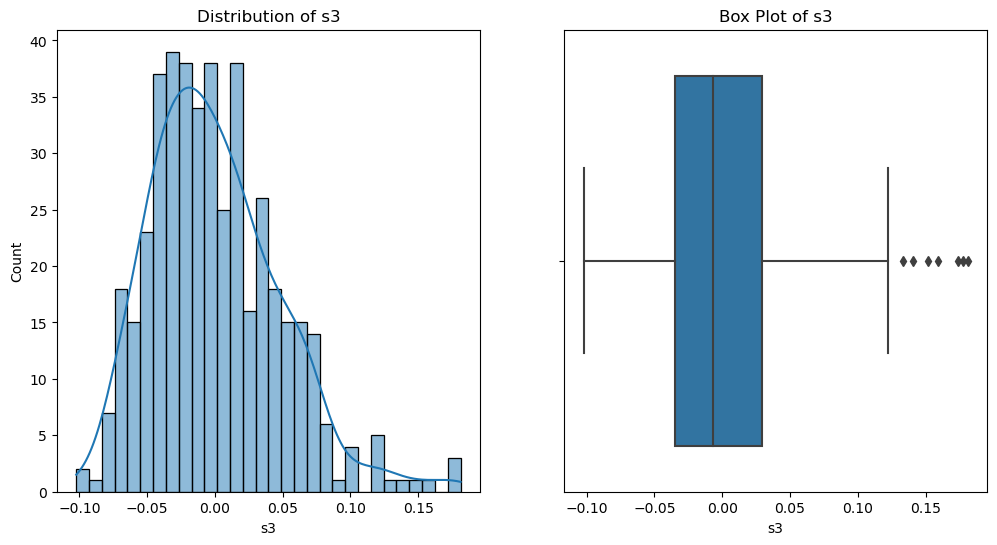

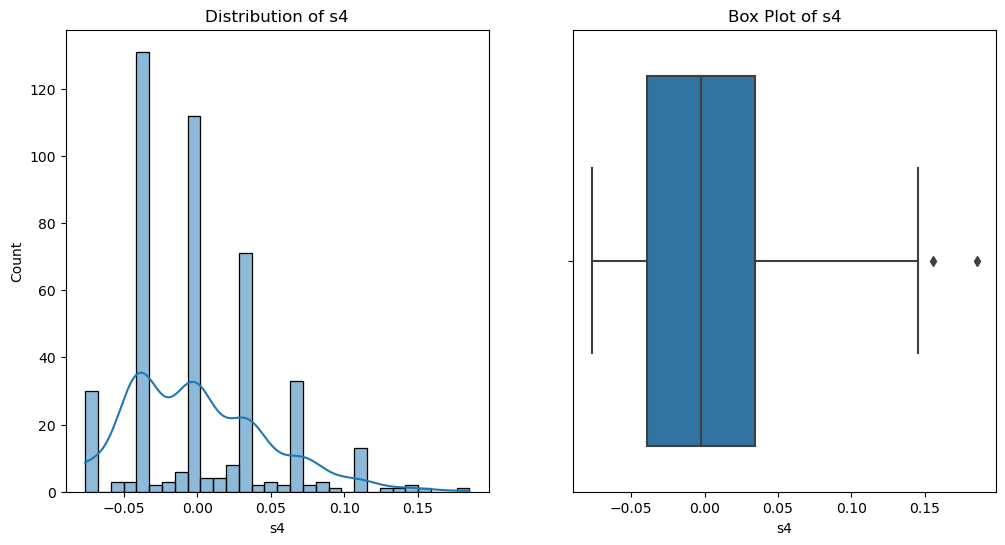

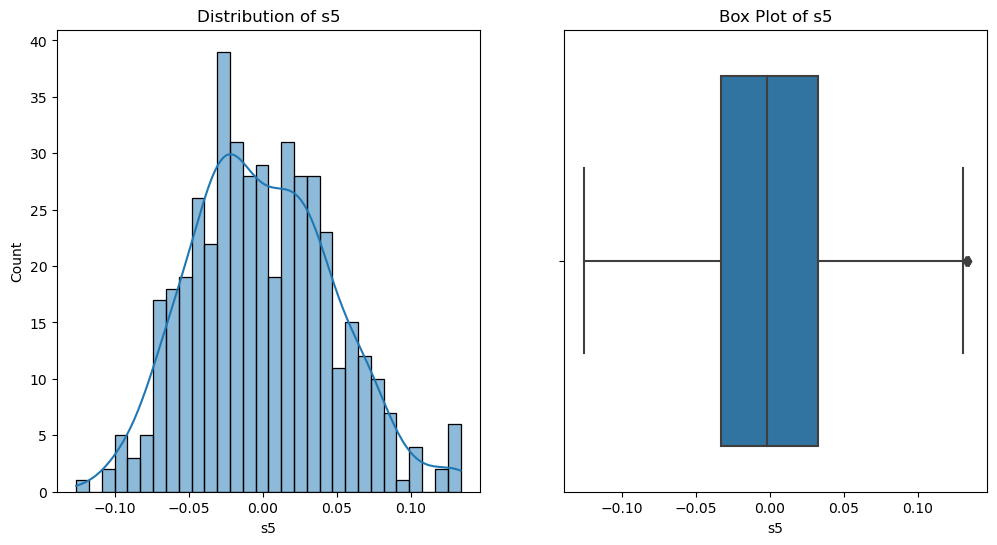

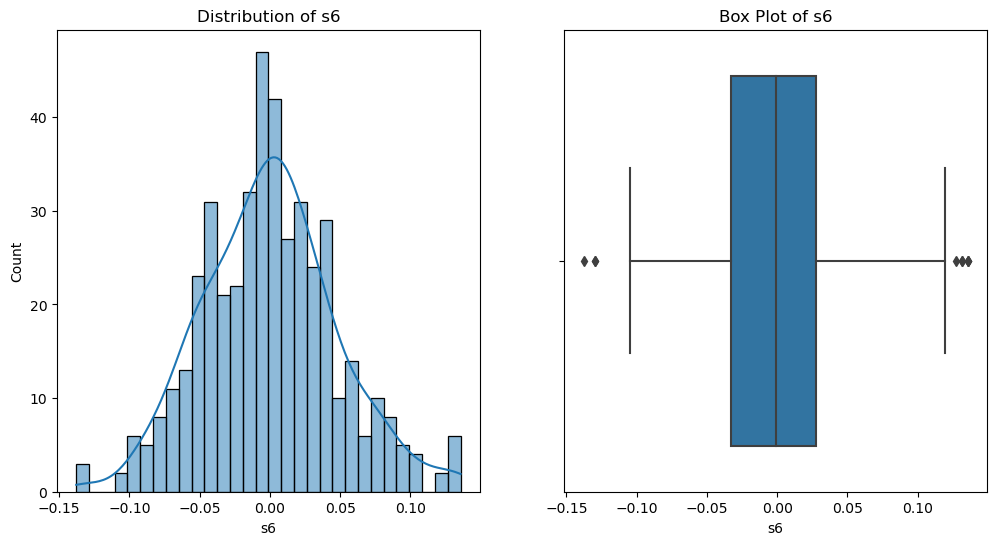

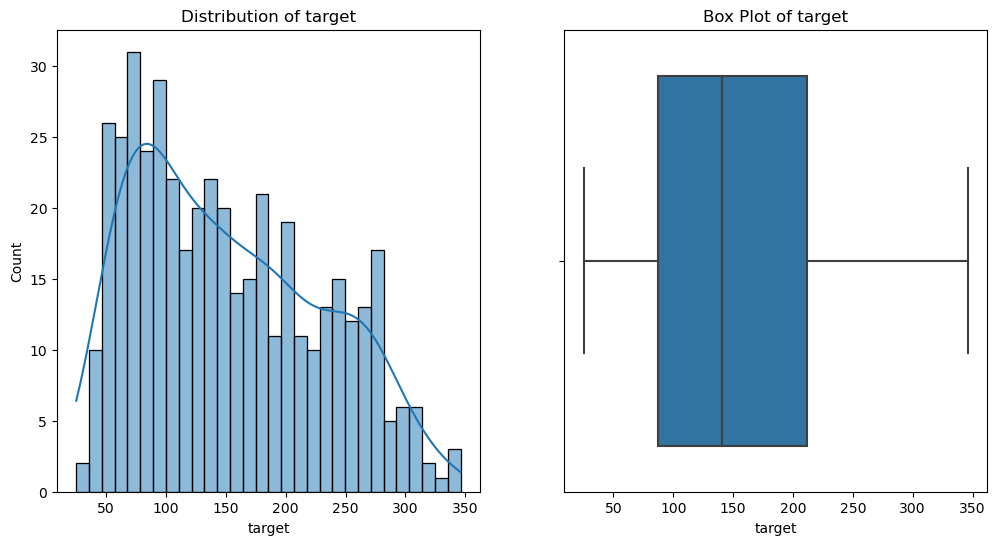

In [22]:
# Visualizing Distributions
for column in diabetes_df.columns:
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    sns.histplot(diabetes_df[column], bins=30, kde=True)
    plt.title(f"Distribution of {column}")
    
    plt.subplot(1, 2, 2)
    sns.boxplot(x=diabetes_df[column])
    plt.title(f"Box Plot of {column}")
    plt.show()

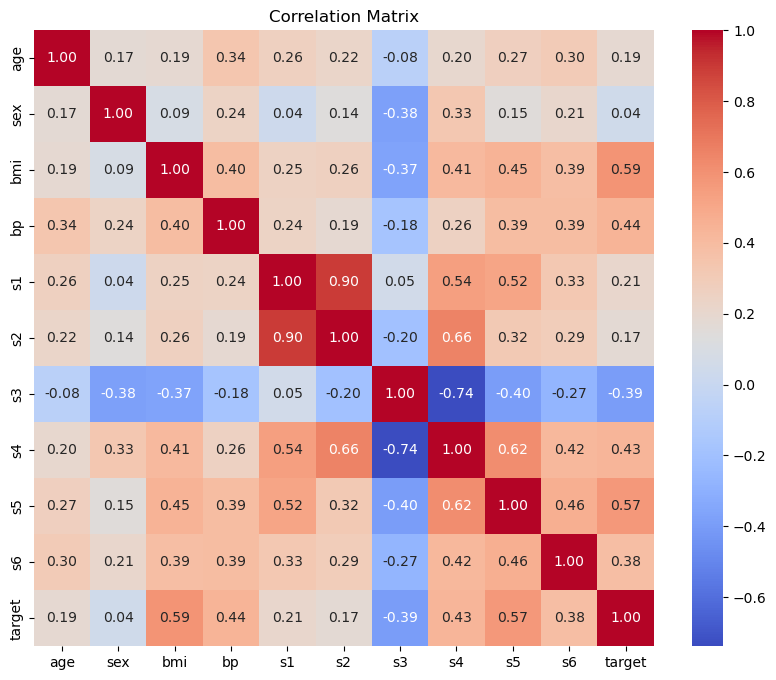

In [23]:
plt.figure(figsize=(10, 8))
sns.heatmap(diabetes_df.corr(), annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()

- Preprocessing

In [24]:
diabetes_data["feature_names"]

['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']

In [27]:
X_train, X_test, y_train, y_test = train_test_split(
    diabetes_df[diabetes_data["feature_names"]], 
    diabetes_df["target"], 
    test_size=0.2, 
    random_state=2024
)

## ii) Data modelling

- i) required - report the coefficients and p-values of OLS by manually implementing them

In [29]:
# Add a constant to the model (for the intercept)
X_train_const = sm.add_constant(X_train)

In [30]:
# Calculate the coefficients using OLS
model = sm.OLS(y_train, X_train_const)
results = model.fit()

In [34]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 target   R-squared:                       0.523
Model:                            OLS   Adj. R-squared:                  0.510
Method:                 Least Squares   F-statistic:                     37.56
Date:                Thu, 17 Oct 2024   Prob (F-statistic):           2.62e-49
Time:                        21:58:24   Log-Likelihood:                -1901.1
No. Observations:                 353   AIC:                             3824.
Df Residuals:                     342   BIC:                             3867.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        153.8072      2.862     53.747      0.000     148.179     159.436
age          -10.9602     67.705     -0.162      0.871    -144.131     122.211
sex         -236.9298     68.833     -3.442      0.001    -372.320    -101.540
bmi          511.8289     71.739      7.135      0.000     370.723     652.935
bp           369.8556     72.380      5.110      0.000     227.489     512.222
s1          -826.7088    460.009     -1.797      0.073   -1731.512      78.094
s2           483.3893    372.397      1.298      0.195    -249.088    1215.867
s3            97.4578    234.725      0.415      0.678    -364.228     559.144
s4           135.1072    178.777      0.756      0.450    -216.533     486.747
s5           745.5196    186.687      3.993      0.000     378.320    1112.719
s6            58.4326     74.940      0.780      0.436     -88.969     205.834
==============================================================================
Omnibus:                        1.648   Durbin-Watson:                   1.824
Prob(Omnibus):                  0.439   Jarque-Bera (JB):                1.500
Skew:                           0.039   Prob(JB):                        0.472
Kurtosis:                       2.690   Cond. No.                         226.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

- ii) other models

## iii) Model evaluation and validation

## iv) Discuss the outcome.



## v) Other experiments (if any)

In [ ]:
mlr2 = lm.IV2SLS(dependent=df["lwage"], exog=df["exper"], endog=df["educ"], instruments=df[["meduc","feduc"]]).fit(cov_type="homoskedastic", debiased=True)
print(mlr2.wu_hausman())

In [ ]:
print(mlr2.sargan)